## LRH-Stat 2022-2023
Supervisé par : A. Larhlimi
# Outils Stat. pour les RH

# AVANT DE COMMENCER
Faites une copie de ce notebook dans votre drive pour être sur que vos modifications seront enregistrées.

Pour cela, aller dans File > Save a copy in Drive

In [ ]:
import numpy as np

import pandas as pd

import seaborn as sns #serie temporaire

import matplotlib.pyplot as plt

from sklearn import preprocessing, svm

from sklearn.model_selection import train_test_split

from sklearn.linear_model import LinearRegression

In [ ]:
#step 1- Mount your Google Drive to Collaboratory

from google.colab import drive
drive.mount('/content/gdrive')
# %cd "/content/drive/MyDrive/IA2023/"
#step 2- Now you will see your Google Drive files in the left pane (file explorer). Right click on the file that you need to import and select çopy path. Then import as usual in pandas, using this copied path.

import pandas as pd
df=pd.read_csv('gdrive/My Drive/IA2023/Fifa_world_cup_matches.csv')
df

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


,team1,team2,possession team1,possession team2,possession in contest,number of goals team1,number of goals team2,date,hour,category,...,penalties scored team1,penalties scored team2,goal preventions team1,goal preventions team2,own goals team1,own goals team2,forced turnovers team1,forced turnovers team2,defensive pressures applied team1,defensive pressures applied team2
0,QATAR,ECUADOR,42%,50%,8%,0,2,20 NOV 2022,17 : 00,Group A,...,0,1,6,5,0,0,52,72,256,279
1,ENGLAND,IRAN,72%,19%,9%,6,2,21 NOV 2022,14 : 00,Group B,...,0,1,8,13,0,0,63,72,139,416
2,SENEGAL,NETHERLANDS,44%,45%,11%,0,2,21 NOV 2022,17 : 00,Group A,...,0,0,9,15,0,0,63,73,263,251
3,UNITED STATES,WALES,51%,39%,10%,1,1,21 NOV 2022,20 : 00,Group B,...,0,1,7,7,0,0,81,72,242,292
4,ARGENTINA,SAUDI ARABIA,64%,24%,12%,1,2,22 NOV 2022,11 : 00,Group C,...,1,0,4,14,0,0,65,80,163,361
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59,ENGLAND,FRANCE,54%,36%,10%,1,2,10 DEC 2022,20 : 00,Quarter-final,...,1,0,9,15,0,0,49,54,193,308
60,ARGENTINA,CROATIA,34%,54%,12%,3,0,13 DEC 2022,20 : 00,Semi-final,...,1,0,12,10,0,0,85,63,321,260
61,FRANCE,MOROCCO,34%,55%,11%,2,0,14 DEC 2022,20 : 00,Semi-final,...,0,0,13,14,0,0,72,47,328,218
62,CROATIA,MOROCCO,45%,45%,10%,2,1,17 DEC 2022,16 : 00,Play-off for third place,...,0,0,7,14,0,0,75,72,288,277


# Fifa World Cup 2022: Complete Dataset
About Dataset

The dataset contains all the matches, updated daily, of the Qatar Fifa World Cup 2022.
Along with the scores and the football teams several statistics for each match were reported; for instance, assists, possession, crosses, number of red and yellow cards, passes, fouls, attempts, switches of play, offsides, and the number of times a certain are of the pitch has been crossed.

In [ ]:
df.head(20)

In [ ]:
df.info()

In [ ]:
df.describe(include='all')

In [ ]:
df["date"]=pd.to_datetime(df["date"])

In [ ]:
x=df["possession team2"][:]
y =[float(x[i].strip('%'))/100 for i in range(len(x))]
df["possession team2"]=y

In [ ]:
x=df["possession team1"][:]
y =[float(x[i].strip('%'))/100 for i in range(len(x))]
df["possession team1"]=y

In [ ]:
x=df["possession in contest"][:]
y =[float(x[i].strip('%'))/100 for i in range(len(x))]
df["possession in contest"]=y

In [ ]:
df_binary = df[['team1', 'possession team1','possession team2','possession in contest']]

In [ ]:
df_binary[df_binary['possession team1']>0.3]

In [ ]:
# analytical summary of datasets
df.describe(include='all')

,team1,team2,possession team1,possession team2,possession in contest,number of goals team1,number of goals team2,date,hour,category,...,penalties scored team1,penalties scored team2,goal preventions team1,goal preventions team2,own goals team1,own goals team2,forced turnovers team1,forced turnovers team2,defensive pressures applied team1,defensive pressures applied team2
count,64,64,64.00000,64.000000,64.000000,64.000000,64.000000,64,64,64,...,64.000000,64.000000,64.000000,64.000000,64.000000,64.000000,64.000000,64.000000,64.000000,64.000000
unique,32,32,NaN,NaN,NaN,NaN,NaN,23,5,13,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,ARGENTINA,MOROCCO,NaN,NaN,NaN,NaN,NaN,01 DEC 2022,20 : 00,Round of 16,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,5,4,NaN,NaN,NaN,NaN,NaN,4,24,8,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,0.44625,0.435312,0.119062,1.578125,1.109375,NaN,NaN,NaN,...,0.140625,0.125000,11.593750,11.359375,0.015625,0.015625,71.968750,70.125000,289.750000,293.265625
std,NaN,NaN,0.11917,0.119854,0.023952,1.551289,1.055856,NaN,NaN,NaN,...,0.350382,0.377964,5.911299,4.990045,0.125000,0.125000,14.394629,13.531269,88.406888,80.916230
min,NaN,NaN,0.14000,0.170000,0.080000,0.000000,0.000000,NaN,NaN,NaN,...,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,38.000000,44.000000,139.000000,141.000000
25%,NaN,NaN,0.34750,0.350000,0.100000,0.000000,0.000000,NaN,NaN,NaN,...,0.000000,0.000000,7.750000,8.000000,0.000000,0.000000,63.000000,60.250000,229.000000,233.750000
50%,NaN,NaN,0.46000,0.425000,0.120000,1.000000,1.000000,NaN,NaN,NaN,...,0.000000,0.000000,11.000000,10.000000,0.000000,0.000000,71.000000,72.000000,281.000000,292.500000
75%,NaN,NaN,0.53000,0.517500,0.130000,2.000000,2.000000,NaN,NaN,NaN,...,0.000000,0.000000,14.000000,14.000000,0.000000,0.000000,83.500000,79.000000,328.000000,327.500000


In [ ]:
df_binary

,team1,possession team1,possession team2,possession in contest
0,QATAR,0.42,0.50,0.08
1,ENGLAND,0.72,0.19,0.09
2,SENEGAL,0.44,0.45,0.11
3,UNITED STATES,0.51,0.39,0.10
4,ARGENTINA,0.64,0.24,0.12
...,...,...,...,...
59,ENGLAND,0.54,0.36,0.10
60,ARGENTINA,0.34,0.54,0.12
61,FRANCE,0.34,0.55,0.11
62,CROATIA,0.45,0.45,0.10


In [ ]:
df_binaryG= df[['possession team1','possession team2','possession in contest']]

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f9a9e385f40>,
      dtype=object)

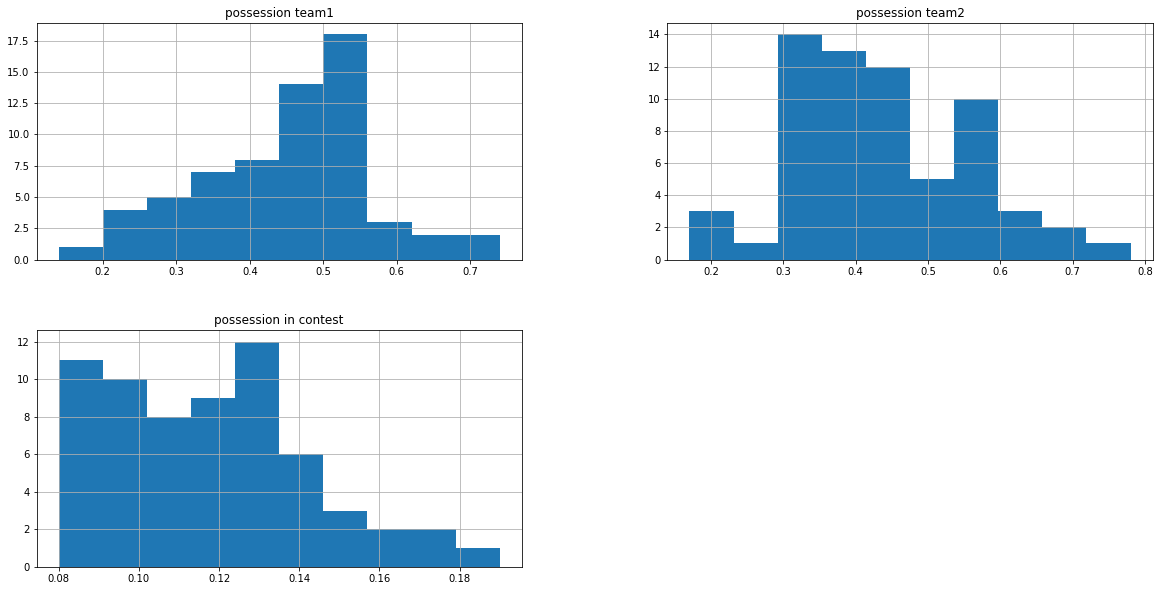

In [ ]:
df_binaryG.hist(figsize=(20,10))

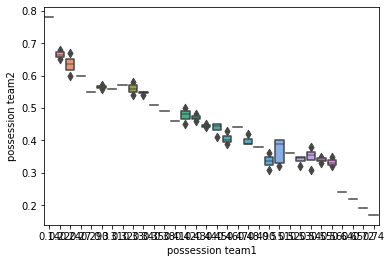

In [ ]:
# Box plot to visualize the relationship between vehicle size and engine hp.
sns.boxenplot(x='possession team1', y = 'possession team2',data=df_binaryG)

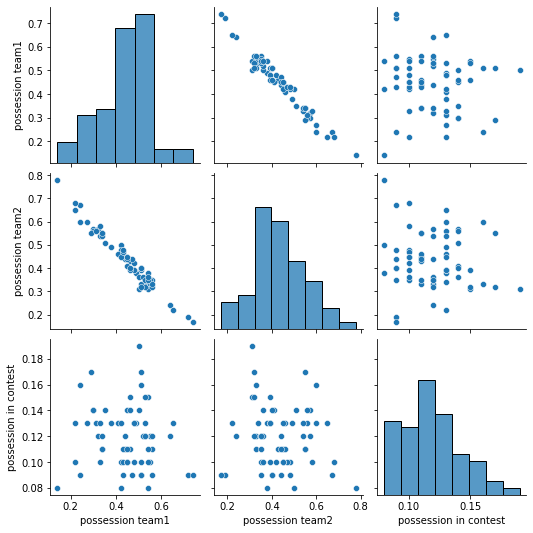

In [ ]:
#Build a pair plot using the seaborn library.
sns.pairplot(df_binary)

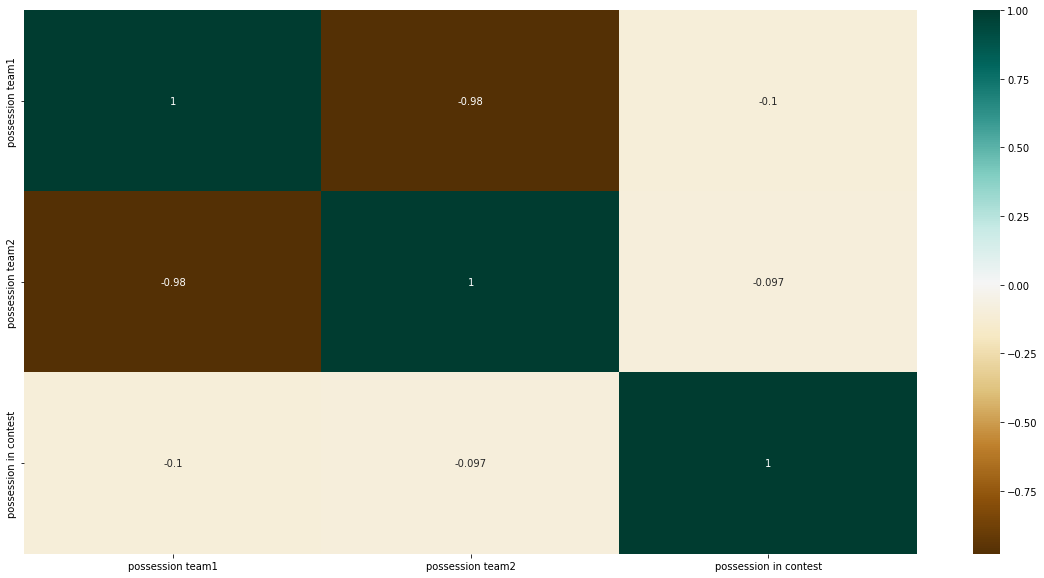

In [ ]:
# Draw a correlation plot between the variables.
plt.figure(figsize=(20,10))
c=df_binary.corr()
sns.heatmap(c,cmap="BrBG",annot=True)

# Nouvelle section

In [ ]:
# /content/gdrive/MyDrive/IA2023/Salary.csv
df2 = pd.read_csv('/content/gdrive/MyDrive/IA2023/Salary.csv')



In [ ]:
df2[df2['Salary']>100000]

# Nouvelle section

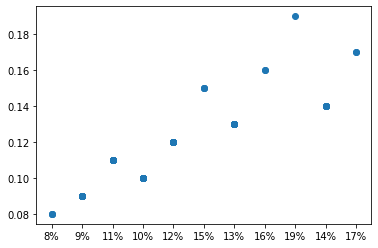

In [ ]:
import matplotlib.pyplot as plt # Pour tracer des graphiques
plt.scatter(x,y)

In [ ]:
df

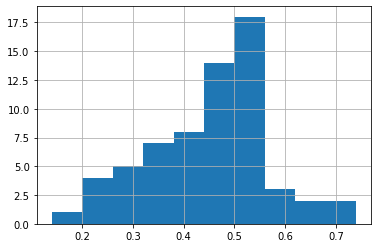

In [ ]:
hist = df['possession team1'].hist()

plt.savefig("pandas_hist_01.png", bbox_inches='tight', dpi=100)

In [ ]:
import matplotlib.pyplot as plt # Pour tracer des graphiques
import numpy as np
import seaborn as sns

In [ ]:
df2=pd.read_csv('gdrive/My Drive/IA2023/Salary.csv')
df2.head()

,YearsExperience,Salary
0,1.1,39343
1,1.3,46205
2,1.5,37731
3,2.0,43525
4,2.2,39891


In [ ]:
df2.describe(include='all')

,YearsExperience,Salary
count,35.000000,35.000000
mean,6.308571,83945.600000
std,3.618610,32162.673003
min,1.100000,37731.000000
25%,3.450000,57019.000000
50%,5.300000,81363.000000
75%,9.250000,113223.500000
max,13.500000,139465.000000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f9a9aad1ca0>,
      dtype=object)

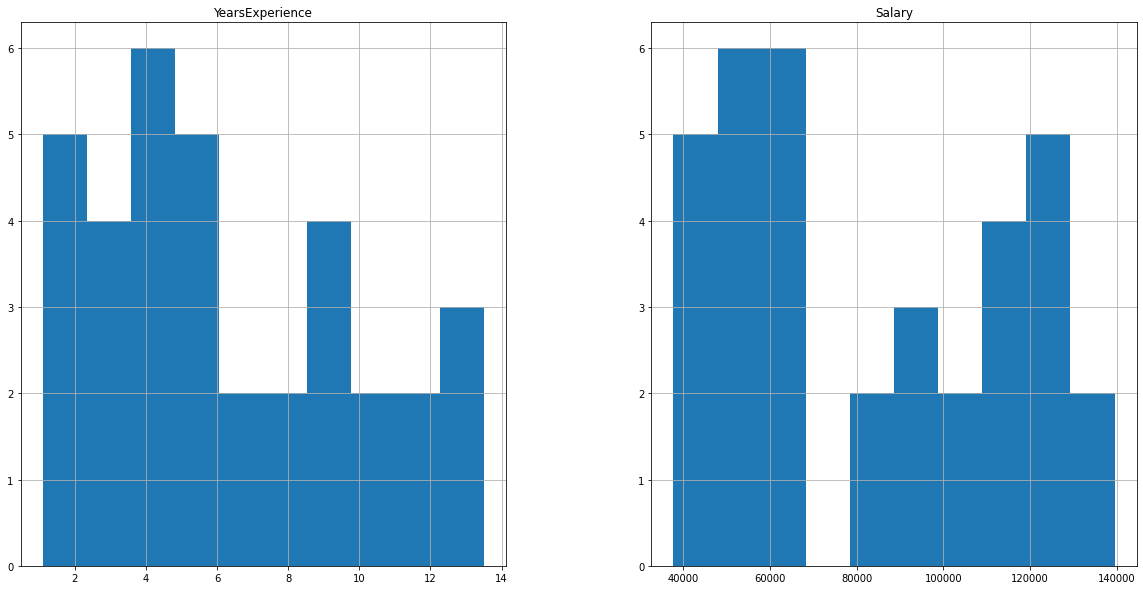

In [ ]:
# Plot a histogram for all the variables.
df2.hist(figsize=(20,10))

In [ ]:
import numpy as np

import pandas as pd

import seaborn as sns

import matplotlib.pyplot as plt

from sklearn import preprocessing, svm

from sklearn.model_selection import train_test_split

from sklearn.linear_model import LinearRegression

In [ ]:
df2_binary = df2[['YearsExperience', 'Salary']]
df2_binary.head()

,YearsExperience,Salary
0,1.1,39343
1,1.3,46205
2,1.5,37731
3,2.0,43525
4,2.2,39891


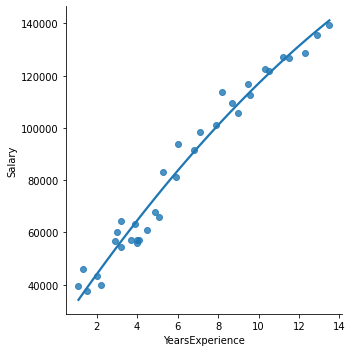

In [ ]:
## Plotting the data scatter
sns.lmplot(x ="YearsExperience", y ="Salary", data = df2_binary, order = 2, ci = None)

In [ ]:
# Eliminating NaN or missing input numbers

df2_binary.fillna(method ='ffill', inplace = True)

In [ ]:
# Separating the data into independent and dependent variables
X = np.array(df2_binary['YearsExperience']).reshape(-1, 1)
y = np.array(df2_binary['Salary']).reshape(-1, 1)

In [ ]:
# Converting each dataframe into a numpy array

# since each dataframe contains only one column

df2_binary.dropna(inplace = True)

# Dropping any rows with Nan values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)

# Splitting the data into training and testing data

regr = LinearRegression()

regr.fit(X_train, y_train)

print(regr.score(X_test, y_test))

0.967296398768069


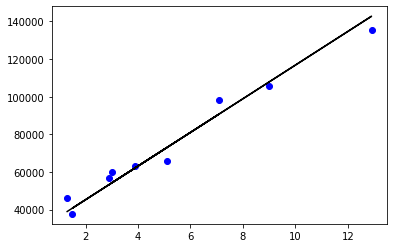

In [ ]:
# Data scatter of predicted values
y_pred = regr.predict(X_test)
plt.scatter(X_test, y_test, color ='b')
plt.plot(X_test, y_pred, color ='k')
plt.show()

Our model's poor accuracy score indicates that our regressive model did not match the current data very well. This implies that our data is ineligible for linear regression. However, a dataset may accept a linear regressor if only a portion of it is considered. Let us investigate that option.

We can observe that the first 500 rows adhere to a linear model. Continuing in the same manner as previously.

In [ ]:
df2_binary500 =df_binary
df2_binary.fillna(method ='ffill', inplace = True)

In [ ]:
df_binary500.fillna(method ='ffill', inplace = True)
X = np.array(df2_binary500['YearsExperience']).reshape(-1, 1)
y = np.array(df2_binary500['Salary']).reshape(-1, 1)
df_binary500.dropna(inplace = True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)
regr = LinearRegression()
regr.fit(X_train, y_train)
print(regr.score(X_test, y_test))
y_pred = regr.predict(X_test)
plt.scatter(X_test, y_test, color ='b')
plt.plot(X_test, y_pred, color ='k')
plt.show()

KeyError: ignored

In [ ]:
# On transforme les colonnes en array
x = np.array(df2['YearsExperience'])
y = np.array(df2['Salary'])

In [ ]:
# On doit transformer la forme des vecteurs pour qu'ils puissent être
# utilisés par Scikit learn
x = x.reshape(-1,1)
y = y.reshape(-1,1)

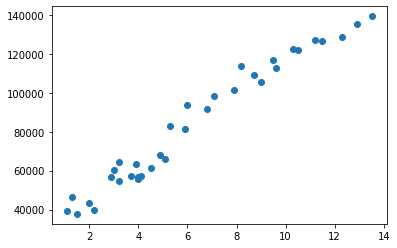

In [ ]:
#D’abord, on peut commencer par tracer la première variable en fonction de l’autre. On
#remarque bien la relation de linéarité entre les deux variables.
plt.scatter(x,y)

In [ ]:
from sklearn.linear_model import LinearRegression
# le module scikit
#Il est temps de construire le modèle :
reg = LinearRegression(normalize=True)
reg.fit(x,y)

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LinearRegression())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)


  warnings.warn(


LinearRegression(normalize=True)

/usr/local/lib/python3.8/dist-packages/seaborn/axisgrid.py:2076: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


<Figure size 864x432 with 0 Axes>

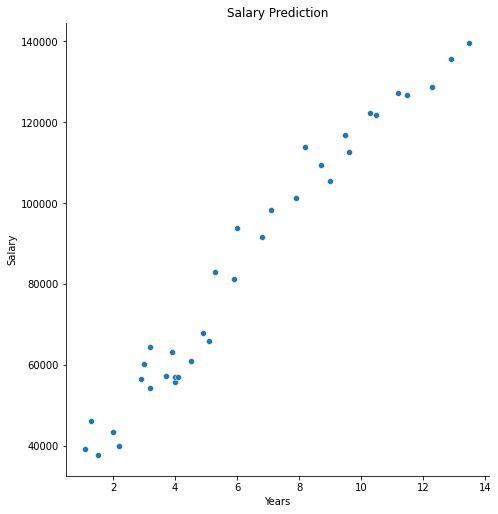

In [ ]:
import seaborn as sns
plt.figure(figsize=(12,6))
sns.pairplot(df2,x_vars=['YearsExperience'],y_vars=['Salary'],size=7,kind='scatter')
plt.xlabel('Years')
plt.ylabel('Salary')
plt.title('Salary Prediction')
plt.show()

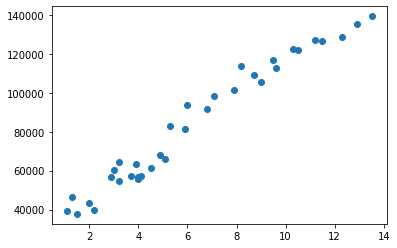

In [ ]:
x = np.array(df2['YearsExperience'])
y = np.array(df2['Salary'])
# On doit transformer la forme des vecteurs pour qu'ils puissent être
# utilisés par Scikit learn
#x = x.reshape(-1,1)
#y = y.reshape(-1,1)
#On a deux colonnes, Years of experience le nombre d’années d’expérience et Salary qui
#donne le salaire.
#D’abord, on peut commencer par tracer la première variable en fonction de l’autre. On
#remarque bien la relation de linéarité entre les deux variables.
plt.scatter(x,y)

In [ ]:
x = x.reshape(-1,1)
y = y.reshape(-1,1)

In [ ]:
from sklearn.linear_model import LinearRegression
# le module scikit
#Il est temps de construire le modèle :
reg = LinearRegression(normalize=True)
reg.fit(x,y)

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LinearRegression())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)


  warnings.warn(


LinearRegression(normalize=True)